In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB

seed = 1234

#  Sentiment prediction on yelp reviews

PROJECT GOAL

Using any of the classification methods covered in Module 5 (or a blend of them) train a model that maximizes accuracy. It is particularly important to identify positive reviews that can be automatically added to client websites as testimonials. Therefore, the model's positive predictive power is most important.

# Classification metrics 

Accuracy: Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correctly classified instances to the total number of instances. It provides a general measure of the model's performance but may not be suitable for imbalanced datasets.

Precision: Precision calculates the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions (true positives + false positives). It focuses on the accuracy of positive predictions and is useful when the cost of false positives is high. Precision = TruePositives / (TruePositives + FalsePositives)

Precision — Out of all the examples that predicted as positive, how many are really positive? A higher precision value means fewer false positives.




# Multinomial Naive Bayes

In [2]:
#importing raw data
raw_data = pd.read_csv('train.csv', low_memory=False)
#importing data to manipulate
df = pd.read_csv('train.csv', low_memory=False)


In [3]:
## Split the data

X = df['text'] # feature
y = df['class'] # target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=seed)

# Initial tuned Model

Cross-Validation Accuracy: [0.80769231 0.83461538 0.84134615 0.8375     0.84903846 0.84423077
 0.83557692 0.82403846 0.82115385 0.84326923 0.84038462 0.83846154
 0.82403846 0.83269231 0.84038462]
Accuracy: 82.62%
Precision: 85.58%


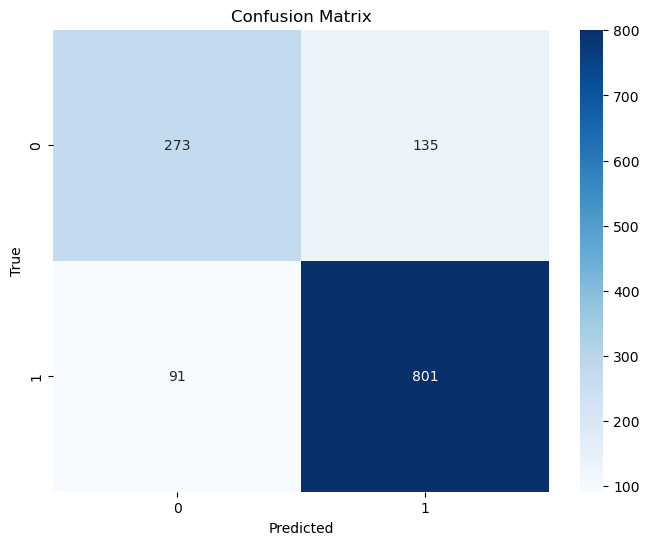

In [9]:
# CountVectorizer with the best parameters
vectorizer = CountVectorizer(binary=True, min_df=0.001, ngram_range=(1, 2))

X_train_vectorized = vectorizer.fit_transform(X_train)

# MultinomialNB
clf = MultinomialNB(alpha=2)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  
cv_scores = cross_val_score(clf, X_train_vectorized, y_train, cv=cv)

clf.fit(X_train_vectorized, y_train)

X_test_vectorized = vectorizer.transform(X_test)

y_pred = clf.predict(X_test_vectorized)

accuracy = clf.score(X_test_vectorized, y_test)
precision = precision_score(y_test, y_pred)

print("Cross-Validation Accuracy: {}".format(cv_scores))
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))

predicted = clf.predict(X_test_vectorized)

cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")


plt.show()

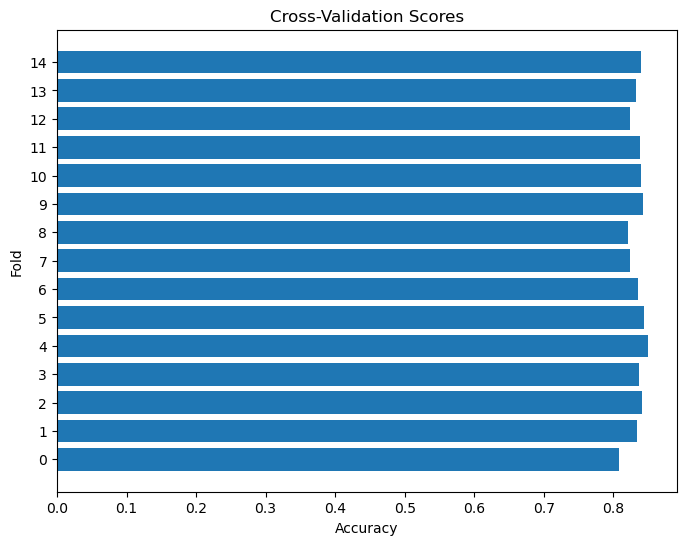

In [10]:
plt.figure(figsize=(8, 6))
plt.barh(range(len(cv_scores)), cv_scores)
plt.ylabel("Fold")
plt.xlabel("Accuracy")
plt.title("Cross-Validation Scores")
plt.yticks(np.arange(len(cv_scores)))
plt.show()

# Increasing Precision

# Undersampling the majority class

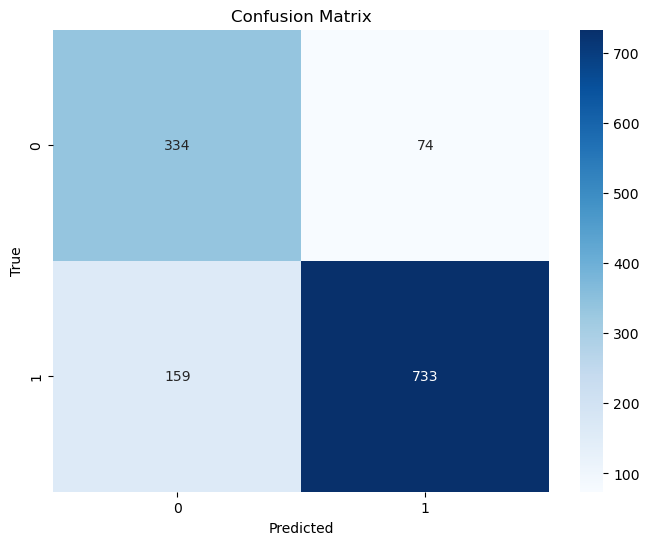

Cross-Validation Scores: [0.79938744 0.81316998 0.79754601 0.8404908  0.76687117 0.82082695
 0.79479326 0.81748466 0.79141104 0.81441718 0.80551302 0.81316998
 0.81288344 0.81595092 0.81134969]
Mean Cross-Validation Accuracy: 80.77%
Accuracy: 82.08%
Precision: 90.83%


In [4]:
vectorizer = CountVectorizer(binary=True, min_df=0.001, ngram_range=(1, 2))

X_train_vectorized = vectorizer.fit_transform(X_train)

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_vectorized, y_train)

clf = MultinomialNB(alpha=2)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=cv)

clf.fit(X_train_resampled, y_train_resampled)

X_test_vectorized = vectorizer.transform(X_test)

predicted = clf.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Cross-Validation Scores: {}".format(cv_scores))
print("Mean Cross-Validation Accuracy: {:.2%}".format(cv_scores.mean()))
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))

# Exploring false positives

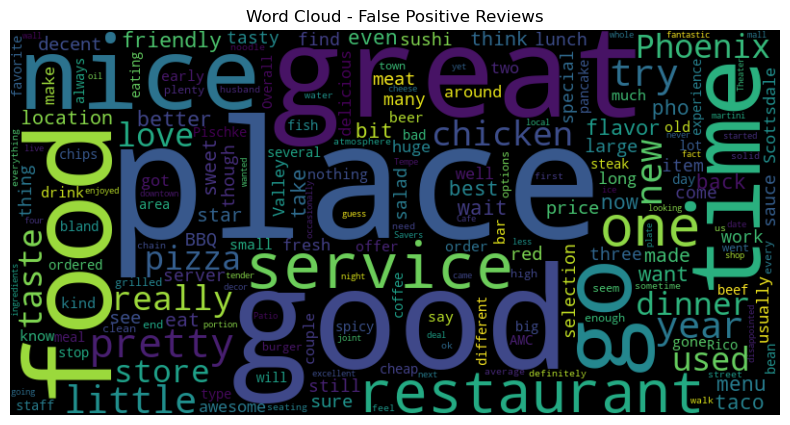

In [5]:
from wordcloud import WordCloud


false_positive_rows = X_test[(y_test == 0) & (predicted == 1)]
true_positive_rows = X_test[(y_test == 1) & (predicted == 1)]


# Combine false positive reviews into a single string
false_positive_text = ' '.join(false_positive_rows)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(false_positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - False Positive Reviews')
plt.show()

# Adding stopwords 

/Users/lou/opt/anaconda3/envs/module_6/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bbq'] not in stop_words.
  warnings.warn(


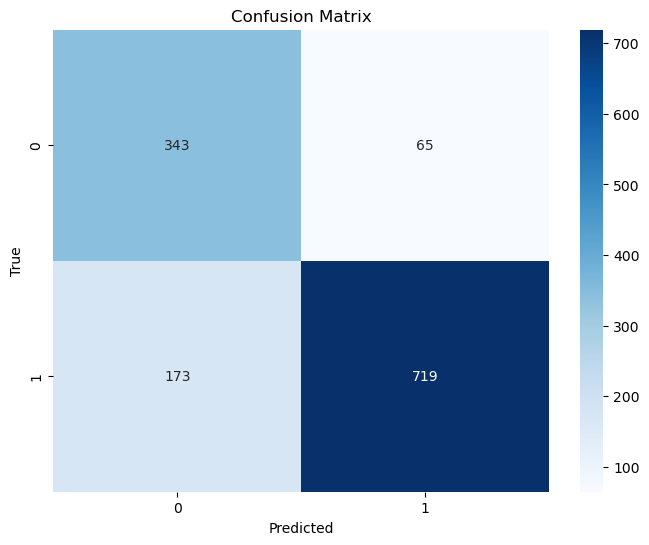

Cross-Validation Scores: [0.762634   0.80245023 0.79447853 0.84509202 0.78374233 0.81929556
 0.79019908 0.80828221 0.78220859 0.79754601 0.80704441 0.79173047
 0.7898773  0.80828221 0.80521472]
Mean Cross-Validation Accuracy: 79.92%
Accuracy: 81.69%
Precision: 91.71%


In [26]:
def remove_stop_words(data, stop_words=[], binary=True, min_df=0.001, ngram_range=(1, 2)):
    vectorizer = CountVectorizer(stop_words=stop_words, binary=binary, min_df=min_df, ngram_range=ngram_range)
    X = vectorizer.fit_transform(data)
    return X, vectorizer

stop_words = [ 'BBQ','go','new','dinner','taco','fresh','phoenix','that', 'with', 'are', 'they', 'on', 
              'place', 'have', 'not', 'had', 'there', 'good', 'great', 'my', 'like', 'so', 'we', 'as', 
              'food','nice','great', 'restaurant', 'service', 'time', 'food', 'friendly', 'pretty']

X, y = df['text'], df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=seed)

X_train_vectorized, vectorizer = remove_stop_words(X_train, stop_words)
X_test_vectorized = vectorizer.transform(X_test)

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_vectorized, y_train)

clf = MultinomialNB(alpha=2)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=cv)

clf.fit(X_train_resampled, y_train_resampled)

predicted = clf.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Cross-Validation Scores: {}".format(cv_scores))
print("Mean Cross-Validation Accuracy: {:.2%}".format(cv_scores.mean()))
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))


# Final Model

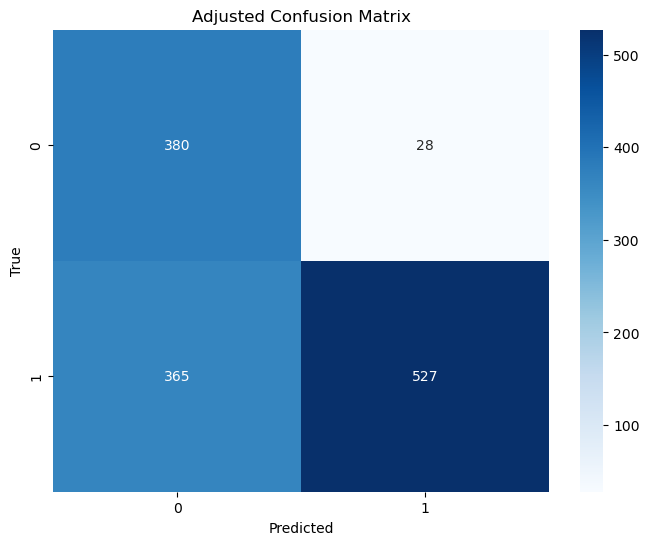

Adjusted Accuracy: 69.77%
Adjusted Precision: 94.95%


In [27]:
# Get predicted probabilities for positive class
predicted_probabilities = clf.predict_proba(X_test_vectorized)[:, 1]

# Define a new threshold (e.g., 0.7) for classifying as positive
new_threshold = 0.99

# Adjust the predictions based on the new threshold
adjusted_predicted = (predicted_probabilities >= new_threshold).astype(int)

# Update the confusion matrix and metrics with the adjusted predictions
adjusted_cm = confusion_matrix(y_test, adjusted_predicted)
adjusted_accuracy = accuracy_score(y_test, adjusted_predicted)
adjusted_precision = precision_score(y_test, adjusted_predicted)

# Display the adjusted confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(adjusted_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Adjusted Confusion Matrix")
plt.show()

# Display the updated metrics
print("Adjusted Accuracy: {:.2%}".format(adjusted_accuracy))
print("Adjusted Precision: {:.2%}".format(adjusted_precision))


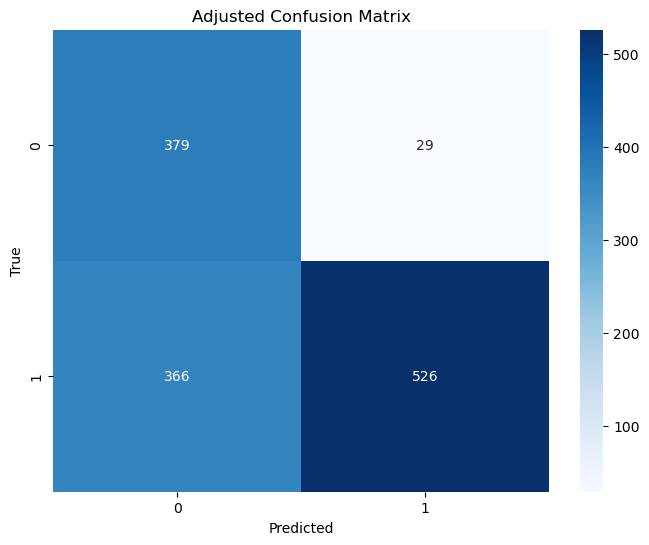

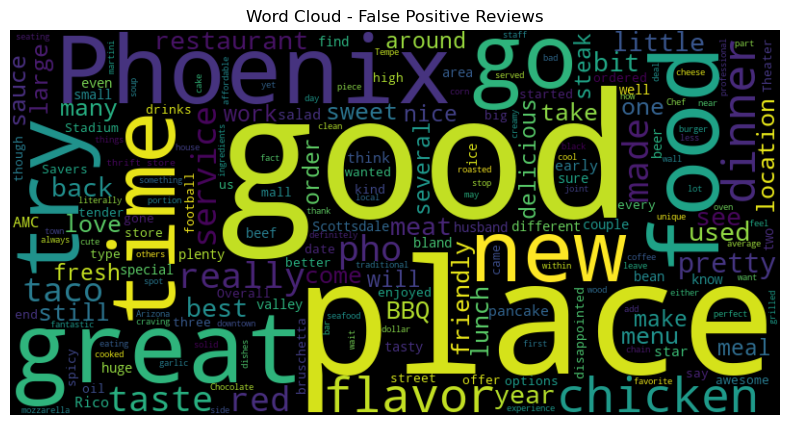

Adjusted Accuracy: 69.62%
Adjusted Precision: 94.77%


In [25]:
from wordcloud import WordCloud

# Get predicted probabilities for positive class
predicted_probabilities = clf.predict_proba(X_test_vectorized)[:, 1]

# Define a new threshold (e.g., 0.99) for classifying as positive
new_threshold = 0.99

# Adjust the predictions based on the new threshold
adjusted_predicted = (predicted_probabilities >= new_threshold).astype(int)

# Select false positive reviews
false_positive_rows = X_test[(y_test == 0) & (adjusted_predicted == 1)]

# Combine false positive reviews into a single string
false_positive_text = ' '.join(false_positive_rows)

# Generate word cloud for false positive reviews
wordcloud = WordCloud(width=800, height=400).generate(false_positive_text)

# Update the confusion matrix and metrics with the adjusted predictions
adjusted_cm = confusion_matrix(y_test, adjusted_predicted)
adjusted_accuracy = accuracy_score(y_test, adjusted_predicted)
adjusted_precision = precision_score(y_test, adjusted_predicted)

# Display the adjusted confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(adjusted_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Adjusted Confusion Matrix")
plt.show()

# Display the word cloud of false positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - False Positive Reviews')
plt.show()

# Display the updated metrics
print("Adjusted Accuracy: {:.2%}".format(adjusted_accuracy))
print("Adjusted Precision: {:.2%}".format(adjusted_precision))


[ 'BBQ','go','new','dinner','taco','fresh','phoenix','that', 'with', 'are', 'they', 'on', 'place', 'have', 'not', 'had', 'there', 'good', 'great', 'my', 'like', 'so', 'we', 'as', 'food','nice','great', 'restaurant', 'service', 'time', 'food', 'friendly', 'pretty']

[ 'that', 'with', 'are', 'they', 'on', 'place', 'have', 'not', 'had', 'there', 'good', 
              'great', 'my', 'like', 'so', 'we', 'as', 'food','nice','great', 'restaurant', 'service',
             'time', 'food', 'friendly', 'pretty']

# Precision vs accuracy

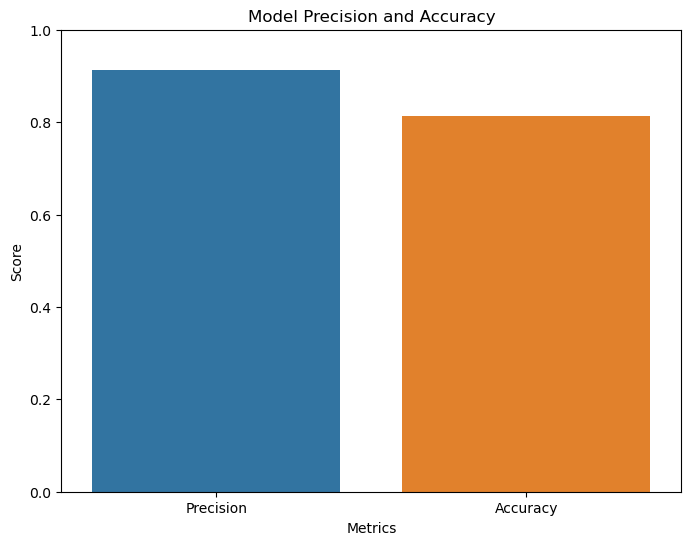

In [17]:
precision = 0.9135
accuracy = 0.8138

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Precision', 'Accuracy'], y=[precision, accuracy])
plt.ylim([0, 1]) 
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Precision and Accuracy')
plt.show()

# Cross validation scores

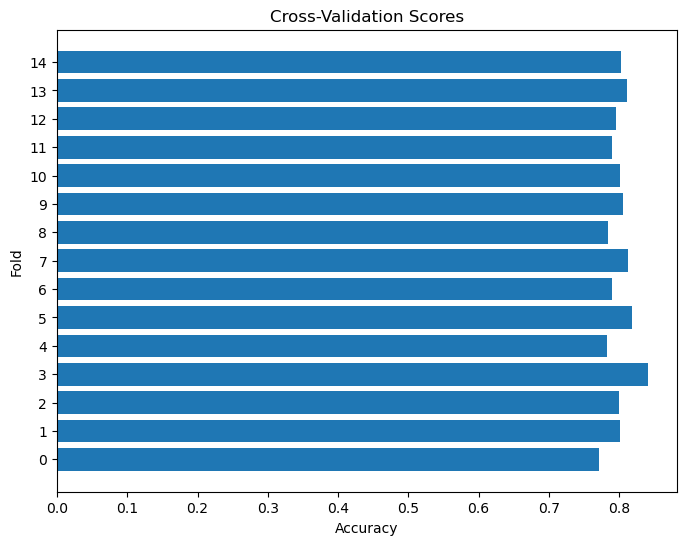

In [14]:
plt.figure(figsize=(8, 6))
plt.barh(range(len(cv_scores)), cv_scores)
plt.ylabel("Fold")
plt.xlabel("Accuracy")
plt.title("Cross-Validation Scores")
plt.yticks(np.arange(len(cv_scores)))
plt.show()

# Confidence of true positives
predicted probability values represent the estimated likelihood of each class label for a given inputpredicted probability values represent the estimated likelihood of each class label for a given input.

The Naive Bayes classifier uses the Bayes' theorem to calculate these probabilities. It assumes that the features are conditionally independent.

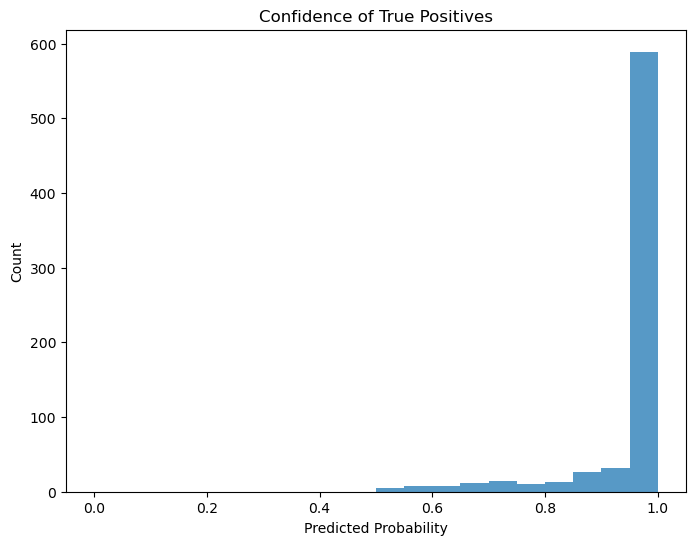

In [15]:
predicted = clf.predict(X_test_vectorized)
predicted_proba = clf.predict_proba(X_test_vectorized)[:, 1]

true_positive_mask = np.logical_and(predicted == 1, y_test == 1)
true_positive_probs = predicted_proba[true_positive_mask]
confidence_scores = predicted_proba

plt.figure(figsize=(8, 6))
plt.hist(true_positive_probs, bins=20, range=(0, 1), alpha=0.75)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Confidence of True Positives")
plt.show()

# Model Parameters

Vectorizer - performs a process called tokenization and creates a numerical representation of the text data. It converts each review into a feature vector representation

Vectorizer parameters

Binary = True

When Binary is set to True, CountVectorizer converts the word occurrences to either 0 or 1. It indicates the presence or absence of a word in a document but disregards the frequency of occurrences.
Setting Binary to True can be useful when you're interested in the presence or absence of words rather than their frequency.

min_df = 0.001

min_df stands for minimum document frequency.
It is a value that represents the minimum number of documents in which a word must appear to be considered as a feature.
By default, min_df is set to 1, which means a word must appear in at least one document to be included as a feature.
Setting min_df to 0.001 means that a word must appear in at least 0.1% of the documents to be considered a feature. It helps filter out rare words that may not contribute much to the overall understanding or analysis

ngram_range = (1,2)

An n-gram is a contiguous sequence of n words. For example, a unigram (n=1) represents a single word, while a bigram (n=2) represents a sequence of two consecutive words.
The ngram_range parameter takes a tuple specifying the minimum and maximum values for n.
In the given example, ngram_range = (1, 2) means that both unigrams and bigrams will be considered as features.


Multinomial NB - the Multinomial Naive Bayes model learns from labeled text data, builds a vocabulary, and calculates probabilities based on the occurrences of words in each class. During prediction, it uses these probabilities to classify new documents into the most likely class.


Multinomial NB parameters

alpha = 2

The alpha parameter represents the additive smoothing parameter, also known as Laplace smoothing or Lidstone smoothing. It helps to avoid zero probabilities when calculating the likelihood of a feature occurring in a class when there are no occurrences of that feature in the training data.

In scikit-learn's MultinomialNB class, the default value for alpha is 1. By setting alpha to a value of 2, you are applying a slightly stronger smoothing effect, which can be useful when dealing with sparse data or when you want to reduce the impact of outliers.
explaination of NB confidence

alpha can deal with words that appear in the test set and words that perhaps min d_f hasn't dealt with.